<a href="https://colab.research.google.com/github/nickehsani/CSE151A_DARWIN_Alzheimer-s/blob/main/Basic_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('processed_df.csv')
df.head()

,Unnamed: 0,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,1
1,1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,1
2,2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,1
3,3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,1
4,4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,1


In [ ]:
# Drop the 'ID' column as it's not needed for the prediction
df = df.drop(columns=['ID'])
df = df.drop(columns=['Unnamed: 0'])

# Step 2: We are trying to predict the value of 'Class'
X = df.drop(columns=['class'])
y = df['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalize the features
scaler = Normalizer()
X_normalized = scaler.fit_transform(X_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=13)


# Step 4: Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Testing Accuracy: " + str(model.score(X_test,y_test)))
print("Training Accuracy: " + str(model.score(X_train,y_train)))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Testing Accuracy: 0.8285714285714286
Training Accuracy: 0.9496402877697842
Confusion Matrix:
 [[15  1]
 [ 5 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.93      0.74      0.82        19

    accuracy                           0.83        35
   macro avg       0.84      0.84      0.83        35
weighted avg       0.85      0.83      0.83        35



In [ ]:
# Step 6: Make predictions
predictions = model.predict(X_test)

# Compare True results vs Prediction results
comparison_df = pd.DataFrame({'True': y_test, 'Predicted': y_pred, 'Model Probability': y_pred_proba})
comparison_df.head()


,True,Predicted,Model Probability
170,0,0,0.369500
7,1,0,0.306534
104,0,0,0.388435
93,0,0,0.232990
10,1,1,0.908114


In [ ]:
# Function to plot the confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Function to plot learning curve
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Function to plot feature importances
def plot_feature_importances(coef, feature_names):
    plt.figure(figsize=(10, 6))
    coef = coef.flatten()
    feature_importance = pd.Series(coef, index=feature_names).sort_values(ascending=False)
    sns.barplot(x=feature_importance, y=feature_importance.index)
    plt.title('Feature Importances')
    plt.show()



Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.93      0.74      0.82        19

    accuracy                           0.83        35
   macro avg       0.84      0.84      0.83        35
weighted avg       0.85      0.83      0.83        35



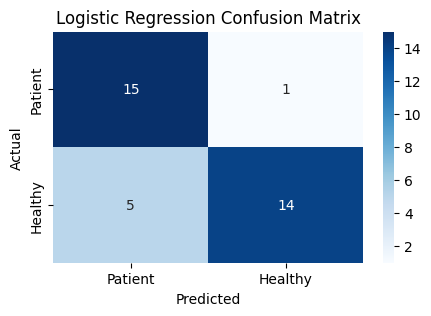

In [ ]:

# Generate evaluation metrics
accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Patient', 'Healthy'], yticklabels=['Patient', 'Healthy'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Logistic Regression Confusion Matrix')
    plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix
plot_confusion_matrix(conf_matrix)



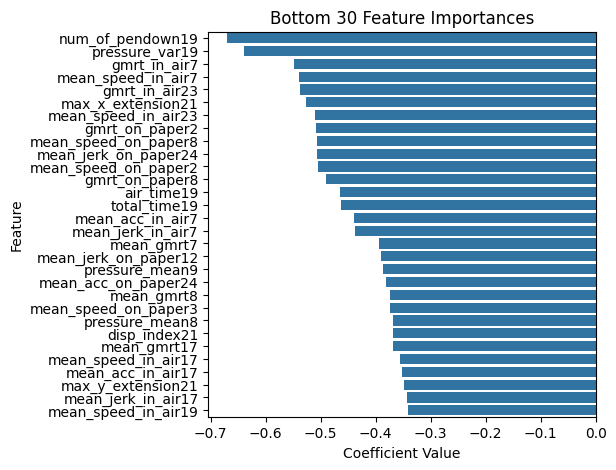

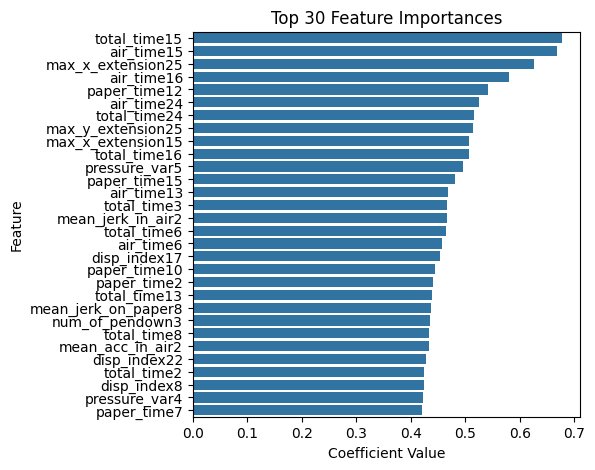

In [ ]:
# Function to plot the bottom N feature importances as a horizontal bar plot
def plot_bottom_feature_importances_bar(coef, feature_names, bottom_n=15):
    plt.figure(figsize=(5, 5))
    coef = coef.flatten()
    feature_importance = pd.Series(coef, index=feature_names).sort_values(ascending=True)
    sns.barplot(x=feature_importance.values[:bottom_n], y=feature_importance.index[:bottom_n])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'Bottom {bottom_n} Feature Importances')
    plt.show()

# Plotting the bottom 20 features as a bar plot
plot_bottom_feature_importances_bar(model.coef_, X.columns, bottom_n=30)

# Function to plot the top N feature importances as a horizontal bar plot
def plot_top_feature_importances_bar(coef, feature_names, top_n=15):
    plt.figure(figsize=(5, 5))
    coef = coef.flatten()
    feature_importance = pd.Series(coef, index=feature_names).sort_values(ascending=False)
    sns.barplot(x=feature_importance.values[:top_n], y=feature_importance.index[:top_n])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Feature Importances')
    plt.show()

# Plotting the top 20 features as a bar plot
plot_top_feature_importances_bar(model.coef_, X.columns, top_n=30)


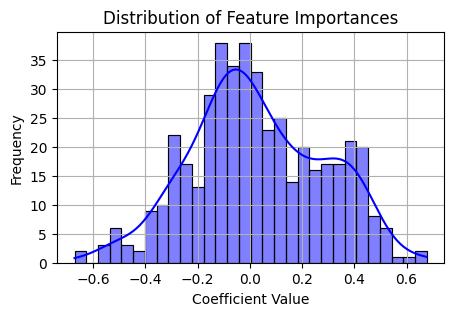

In [ ]:
# Function to plot the distribution of feature importances
def plot_feature_importances_distribution(coef, feature_names):
    plt.figure(figsize=(5, 3))
    coef = coef.flatten()
    feature_importance = pd.Series(coef, index=feature_names)
    sns.histplot(feature_importance, kde=True, bins=30, color='blue')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Frequency')
    plt.title('Distribution of Feature Importances')
    plt.grid(True)
    plt.show()

# Plotting the distribution of feature importances
plot_feature_importances_distribution(model.coef_, X.columns)